# Jeu et Test statistique : Pierre-Feuille-Ciseaux

## Simulation d'une chaine de Markov

In [1]:
import numpy as np
from tkinter import*
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use("TkAgg")
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure

### Création de la matrice de transition "P".

In [2]:
import numpy as np

P = np.array([
    [0.8, 0.1, 0.1],  
    [0.3, 0.4, 0.3],  
    [0.1, 0.1, 0.8]   
])


### Création de la fonction "randomPFS(a,b)" pour l'obtention de 0, 1 et 2 aves les probabilités a, b, et 1 - a - b.

In [3]:
def randomPFS(a,b):
    
    assert 0 <= a <= 1, "a entre 0 et 1"
    assert 0 <= b <= 1, "b entre 0 et 1"
    assert a + b <= 1, "a + b inférieur ou egal à 1"
    
    r = np.random.random()
    
    if r < a:
        return 0
    elif r < a + b:
        return 1
    else:
        return 2
    

In [4]:
randomPFS(0.005, 0.1)

2

### Création de la fonction "sampleMarkov(P,n)" pour générer la chaine de Markov 

In [5]:
def sampleMarkov(P,n):

    assert np.allclose(P.sum(axis=1), 1), "Chaque ligne de la matrice P doit sommer à 1."
    
    num_states = P.shape[0]
    
    state = np.random.choice(num_states)
    
    sequence = [state]
    
    for _ in range(n - 1):
        state = np.random.choice(num_states, p=P[state])
        sequence.append(state)
    
    return sequence


chain = sampleMarkov(P,100)
print("Chaine de Markov générée :" , chain)


Chaine de Markov générée : [2, 0, 0, 0, 1, 2, 2, 2, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 2, 0, 0, 0, 0, 1, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 0, 0, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


La chaîne de Markov générée reflète le comportement attendu d’un processus de Markov dicté par la matrice de transition $P$. Les états comme $0$ et $2$ persistent plus longtemps en raison de probabilités diagonales plus élevées, tandis que les transitions telles que $2 → 1$ ou $1 → 0$ se produisent moins fréquemment, reflétant les probabilités hors diagonale. Bien que la séquence semble aléatoire, elle suit les règles stochastiques de $P$, où les états futurs dépendent de l’état actuel.

## Implémentation du jeu.

In [6]:
#Règle du jeu : 1 pour un coup gagnant, -1 pour un coup perdant et 0 pour égalité
dico=["Pierre","Feuille","Ciseaux"]
regle=np.array([[0,-1,1],[1,0,-1],[-1,1,0]]) 

#Initialisation
coupsHumain=[]
victoires=[]
Score=0
ScoreList=[]


In [7]:
#programmation du jeu
def jouer(a):
    #Prise de décision de l'ordinateur
    coupMachine=np.random.choice([0,1,2])
    
    #Sauvegarde du coup de l'humain
    coupsHumain.append(a)
    
    #sauvegarde du résultat
    victoires.append(regle[coupsHumain[-1],coupMachine])
    
    #Score total de l'humain
    Score=sum(victoires)
    ScoreList.append(Score)
    
    #Affichage du choix de l'ordinateur et du résultat
    message1="Humain :",dico[coupsHumain[-1]],"Machine :",dico[coupMachine],"gain pour l'humain :",regle[coupsHumain[-1],coupMachine]
    message2="Score total de l'humain :",Score
    
    return (message1,message2,victoires,Score,ScoreList)

In [8]:

#Interface Homme-Machine
fenetre=Tk()
fenetre.title("à vous de jouer")
fenetre.minsize(width=600,height=600)
formulaire=Canvas(fenetre)
formulaire.pack()

label1=Label(formulaire)
label1.grid(row=3,column=1)

label2=Label(formulaire)
label2.grid(row=4,column=1)


def afficherPierre():
    Mes1,Mes2,Vict,score,scorelist=jouer(0)
    label1.config(text=Mes1)
    label2.config(text=Mes2)
    nb_parties=len(scorelist)
    plt.plot(scorelist)
    plt.xlim(0,nb_parties)
    plt.ylim(-nb_parties,nb_parties)
    plt.xlabel("nombre de parties")
    plt.ylabel("Votre score")
    plt.title("Historique")
    plt.show()
    
      
def afficherFeuille():
    Mes1,Mes2,Vict,score,scorelist=jouer(1)
    label1.config(text=Mes1)
    label2.config(text=Mes2)
    nb_parties=len(scorelist)
    plt.plot(scorelist)
    plt.xlim(0,nb_parties)
    plt.ylim(-nb_parties,nb_parties)
    plt.xlabel("nombre de parties")
    plt.ylabel("Votre score")
    plt.title("Historique")
    plt.show()

def afficherCiseaux():
    Mes1,Mes2,Vict,score,scorelist=jouer(2)
    label1.config(text=Mes1)
    label2.config(text=Mes2)
    nb_parties=len(scorelist)
    plt.plot(scorelist)
    plt.xlim(0,nb_parties)
    plt.ylim(-nb_parties,nb_parties)
    plt.xlabel("nombre de parties")
    plt.ylabel("Votre score")
    plt.title("Historique")
    plt.show()
        

Pierre=Button(formulaire,text="Pierre",command=afficherPierre)
Pierre.grid(row=0,column=0)

Feuille=Button(formulaire,text="Feuille",command=afficherFeuille)
Feuille.grid(row=0,column=1)

Ciseaux=Button(formulaire,text="Ciseaux",command=afficherCiseaux)
Ciseaux.grid(row=0,column=2)


    

mainloop()

Le graphique montre l’historique du score du joueur humain en fonction du nombre de parties jouées.

Une pente positive indique que l'humain est en train de gagner.
Une pente négative signifie que l'ordinateur prend l'avantage.
Une ligne plate traduit un match nul ou une variation insignifiante du score.

### Amelioration 1

In [9]:
#Fonction qui donne le nombre de (i,j) dans une liste b de taille >2
def nij(b,i,j):
    return sum(1 for x, y in b if x == i and y == j)

"""
    Compte le nombre d'occurrences de la paire (i, j) dans la liste b.
    b : Une liste de coups où chaque élément est un tuple (coup_humain, coup_machine).
    i : Coup du joueur humain à compter.
    j : Coup de la machine à compter.
    Retourne : Le nombre d'occurrences de (i, j) dans b.
   
    """

"\n    Compte le nombre d'occurrences de la paire (i, j) dans la liste b.\n    b : Une liste de coups où chaque élément est un tuple (coup_humain, coup_machine).\n    i : Coup du joueur humain à compter.\n    j : Coup de la machine à compter.\n    Retourne : Le nombre d'occurrences de (i, j) dans b.\n   \n    "

In [10]:
import numpy as np
# Règle du jeu
dico = ["Pierre", "Feuille", "Ciseaux"]
regle = np.array([[0, -1, 1], [1, 0, -1], [-1, 1, 0]])   #1 pour un coup gagnant, -1 pour 1 perdant 
# et 0 pour égalité

# Initialisation
coupsHumain=[]
victoires=[]
Score=0
ScoreList=[]
Mem = np.zeros((3, 3), dtype=int)  # Matrice de transition


# Programme de jeu
def jouer2(a):
    """
    fonction pour simuler un jeu Pierre-Papier-Ciseaux entre un humain et une machine.
    """
    global Mem
    
    #Prise de décision de l'ordinateur
    coupMachine = np.random.choice([0, 1, 2])  
    
    #Sauvegarde du coup de l'humain
    coupsHumain.append(a)
    
     #sauvegarde du résultat
    victoires.append(regle[coupsHumain[-1], coupMachine])
    Mem[coupsHumain[-1], coupMachine] += 1  # Mise a jour de  Mem
    
     #Score total de l'humain
    Score = sum(victoires)
    ScoreList.append(Score)
    
    #Affichage du choix de l'ordinateur et du résultat
    message1 = f"Humain: {dico[coupsHumain[-1]]}, Machine: {dico[coupMachine]}, Gain pour humain: {regle[coupsHumain[-1], coupMachine]}"
    message2 = f"Score total de l'humain: {Score}"
    
    return message1, message2, victoires, Score, ScoreList, Mem


# Interface Homme-Machine
fenetre = Tk()
fenetre.title("à vous de jouer")
fenetre.minsize(width=600, height=600)
formulaire = Canvas(fenetre)
formulaire.pack()

label1 = Label(formulaire)
label1.grid(row=3, column=1)

label2 = Label(formulaire)
label2.grid(row=4, column=1)

label3 = Label(formulaire)  # Pour affichage Mem
label3.grid(row=5, column=1)

# fonction pour afficher les comptages de Mem et nij 
def display_transition_counts():
    """
    fonction qui affiche la matrice de transition et les comptages nij
    """
    for i in range(3):
        for j in range(3):
            print(f"nij({i}, {j}) = {nij(list(zip(coupsHumain, victoires)), i, j)}")


def afficherPierre():
    Mes1, Mes2, Vict, score, scorelist, mem = jouer2(0)
    label1.config(text=Mes1)
    label2.config(text=Mes2)
    label3.config(text=f"Mem:\n{mem}")  
    nb_parties = len(scorelist)
    plt.plot(scorelist)
    plt.xlim(0, nb_parties)
    plt.ylim(-nb_parties, nb_parties)
    plt.xlabel("nombre de parties")
    plt.ylabel("Votre score")
    plt.title("Historique")
    plt.show()


def afficherFeuille():
    Mes1, Mes2, Vict, score, scorelist, mem = jouer2(1)
    label1.config(text=Mes1)
    label2.config(text=Mes2)
    label3.config(text=f"Mem:\n{mem}")  
    nb_parties = len(scorelist)
    plt.plot(scorelist)
    plt.xlim(0, nb_parties)
    plt.ylim(-nb_parties, nb_parties)
    plt.xlabel("nombre de parties")
    plt.ylabel("Votre score")
    plt.title("Historique")
    plt.show()


def afficherCiseaux():
    Mes1, Mes2, Vict, score, scorelist, mem = jouer2(2)
    label1.config(text=Mes1)
    label2.config(text=Mes2)
    label3.config(text=f"Mem:\n{mem}")  
    nb_parties = len(scorelist)
    plt.plot(scorelist)
    plt.xlim(0, nb_parties)
    plt.ylim(-nb_parties, nb_parties)
    plt.xlabel("nombre de parties")
    plt.ylabel("Votre score")
    plt.title("Historique")
    plt.show()


Pierre = Button(formulaire, text="Pierre", command=afficherPierre)
Pierre.grid(row=0, column=0)

Feuille = Button(formulaire, text="Feuille", command=afficherFeuille)
Feuille.grid(row=0, column=1)

Ciseaux = Button(formulaire, text="Ciseaux", command=afficherCiseaux)
Ciseaux.grid(row=0, column=2)

mainloop()


### Amelioration 2

In [11]:
# Regle du jeu
dico = ["Pierre", "Feuille", "Ciseaux"]
regle = np.array([[0, -1, 1], [1, 0, -1], [-1, 1, 0]])  # 1 pour un gagnant, -1 pour perdant, et 0 pur égalité

# Initialisation
coupsHumain=[]
victoires=[]
Score=0
ScoreList=[]
Mem = np.zeros((3, 3), dtype=int)  # Matrice de transition


# Programme de jeu avec prise de décision par IA

def jouer3(a):
    """
    Simuler un seul tour du jeu en utilisant l'IA pour la décision de l'ordinateur.
    
    """
    global Score, coupsHumain, victoires, ScoreList, Mem

    # Prise de décision pour l'ordinateur
    if len(coupsHumain) > 0:  # le programme s'assure que un coup est bien joue
        dernier_coup_humain = coupsHumain[-1]
        total_transitions = np.sum(Mem[dernier_coup_humain, :])

        # si nous avons assez de donnee, on calcule les frequences relatives
        if total_transitions > 0:
            probabilites = Mem[dernier_coup_humain, :] / total_transitions
        else:
            probabilites = np.array([1/3, 1/3, 1/3])  # probabilite uniforme par default

        # Calculer les gains directement à partir des  Mem
        gains = [
            Mem[dernier_coup_humain, 2] - Mem[dernier_coup_humain, 1],  # g(0): Pierre
            Mem[dernier_coup_humain, 0] - Mem[dernier_coup_humain, 2],  # g(1): Feuille
            Mem[dernier_coup_humain, 1] - Mem[dernier_coup_humain, 0]   # g(2): Ciseau
        ]

        # Choisir le coup avec le gain attendu maximal.
        coupMachine = np.argmax(gains)
    else:
        coupMachine = np.random.choice([0, 1, 2])  # Coup aléatoire pour le premier tour.

    # Sauvegarde du coup du joueur.
    coupsHumain.append(a)

    
    victoires.append(regle[coupsHumain[-1], coupMachine])
    Mem[coupsHumain[-1], coupMachine] += 1  # Update Mem

    # Totale score d'humain
    Score = sum(victoires)
    ScoreList.append(Score)

    
    message1 = f"Humain: {dico[coupsHumain[-1]]}, Machine: {dico[coupMachine]}, Gain pour humain: {regle[coupsHumain[-1], coupMachine]}"
    message2 = f"Total score for human: {Score}"

    return message1, message2, victoires, Score, ScoreList, Mem



# Interface Homme-Machine
fenetre = Tk()
fenetre.title("À vous de jouer !")
fenetre.minsize(width=600, height=600)
formulaire = Canvas(fenetre)
formulaire.pack()

label1 = Label(formulaire)
label1.grid(row=3, column=1)

label2 = Label(formulaire)
label2.grid(row=4, column=1)

label3 = Label(formulaire)  
label3.grid(row=5, column=1)


def afficherPierre():
    Mes1, Mes2, Vict, score, scorelist, mem = jouer3(0)
    label1.config(text=Mes1)
    label2.config(text=Mes2)
    label3.config(text=f"Mem:\n{mem}")  
    nb_parties = len(scorelist)
    plt.plot(scorelist)
    plt.xlim(0, nb_parties)
    plt.ylim(-nb_parties, nb_parties)
    plt.xlabel("nombre de parties")
    plt.ylabel("Votre score")
    plt.title("Historique")
    plt.show()


def afficherCiseaux():
    Mes1, Mes2, Vict, score, scorelist, mem = jouer3(1)
    label1.config(text=Mes1)
    label2.config(text=Mes2)
    label3.config(text=f"Mem:\n{mem}")  
    nb_parties = len(scorelist)
    plt.plot(scorelist)
    plt.xlim(0, nb_parties)
    plt.ylim(-nb_parties, nb_parties)
    plt.xlabel("nombre de parties")
    plt.ylabel("Votre score")
    plt.title("Historique")
    plt.show()


def afficherCiseaux():
    Mes1, Mes2, Vict, score, scorelist, mem = jouer3(2)
    label1.config(text=Mes1)
    label2.config(text=Mes2)
    label3.config(text=f"Mem:\n{mem}")  
    nb_parties = len(scorelist)
    plt.plot(scorelist)
    plt.xlim(0, nb_parties)
    plt.ylim(-nb_parties, nb_parties)
    plt.xlabel("nombre de parties")
    plt.ylabel("Votre score")
    plt.title("Historique")
    plt.show()


Pierre = Button(formulaire, text="Pierre", command=afficherPierre)
Pierre.grid(row=0, column=0)

Feuille = Button(formulaire, text="feuille", command=afficherFeuille)
Feuille.grid(row=0, column=1)

Ciseaux = Button(formulaire, text="ciseaux", command=afficherCiseaux)
Ciseaux.grid(row=0, column=2)

mainloop()


Comme l'IA s'adapte aux tendances du joueur humain dans ce jeu, il y a une évolution du comportement. Au départ, elle joue de manière aléatoire, ayant peu de données, mais elle apprend rapidement des schémas. 

Par exemple, si après Pierre, le joueur humain joue toujours Papier, l'IA apprendra à jouer Ciseaux. Une tendance de performance positive dans le graphique ci-dessus signifie que l'humain gagne, tandis qu'une tendance plate ou négative montre que l'IA contre efficacement. Cette approche adaptative rend le jeu plus stimulant et dynamique.

## Test statistique

Ici on crée une liste "listeHasard" de taille $100$ qu'on remplit nous-même d'entiers égaux à $1$ ou $-1$ en tentant de respecter une répartition uniforme de ces deux entiers. On crée ensuite une liste "listeMachine" de même taille d'eniters égaux à $-1$ ou $1$ à l'aide de la fonction "np.random.choice". 

In [12]:
import numpy as np

liste_Hasard= [1, -1, 1, 1, -1, -1, 1, 1, -1, 1, 1, 1, 1, -1, -1, -1, 1, 1, -1, -1,
1, -1, 1, 1, 1, 1, 1, -1, -1, -1, 1, 1, 1, -1, -1, 1, -1, 1, -1, 1,
 1, -1, -1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, 1,
 -1, 1, 1, -1, 1, -1, 1, -1, -1, 1, 1, 1, -1, -1, -1, 1, 1, 1, -1, 1,
 1, 1, 1, 1, -1, -1, 1, 1, -1, -1, -1, -1, 1, -1, 1, -1, 1, 1, -1, 1]
list_Machine = np.random.choice([-1, 1], size=100).tolist()



Ici on veut : 
- Calculer $I(0)$. 
- Donner quelle information donne $I(p)$ pour $p>0$  
- Donner la valeur de $I(p)$ lorsque les $X_k$ sont des variables mutuellement indépendantes et uniformément distribuées sur $\{-1,1\}$ 

In [13]:
def calcul_I(sequence, p):
    n = len(sequence)
    if p == 0:
        # Calcule de I(0) : Tous les éléments au carré sont égaux à 100, donc le résultat est toujours 1.
        return 100
    else:
        # Calcul de I(p): Correlation pour le retard de p
        return sum(sequence[k] * sequence[k + p] for k in range(n-p)) 

# Example 
p=0
I_p = calcul_I(liste_Hasard, p)

print(f"I({p}) =", I_p)


I(0) = 100


Ici, $I(p)$ décrit la corrélation d'une série avec un retard de $p$ périodes. Lorsque $I(p)$ est proche de $0$, il y aura peu ou pas de corrélation entre $X_k$ et $X_{k+p}$, indiquant que la série présente un caractère aléatoire sur le retard donné.

Pour $X_k$ indépendants et uniformément distribués, $E[I(p)]=0$ car il n'y a aucune corrélation entre $X_k$ et $X_{k+p}$, ce qui reflète le caractère aléatoire de la séquence.

### Création d'une fonction "autocorr(X,p)" qui prend en argument une liste $X$ de $100$ entiers, un entier $p\in \{0,\ldots,99\}$ et qui renvoie l'autocorrélation de $X$ en $p$.

In [14]:
def autocorr(X,p):
    n = len(X)
    assert 0 <= p < n
    
    return sum(X[k] * X[k + p] for k in range(n - p)) 

# Example
s1= autocorr(liste_Hasard,0)
print(s1)


100


### Représentation de l'autocorrélation de ces deux listes en fonction de $p$

In [15]:
import matplotlib.pyplot as plt


# Calculer l'autocorrélation pour tous les retards.
retard = range(100)
autocorr_random = [autocorr(liste_Hasard, p) for p in retard]
autocorr_machine = [autocorr(list_Machine, p) for p in retard]

# Tracer les résultats.
plt.figure(figsize=(10, 6))
plt.plot(retard, autocorr_random, label="listHasard", marker='o')
plt.plot(retard, autocorr_machine, label="listMachine", marker='x')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.7)  
plt.title("Autocorrelation de listHasard et listMachine")
plt.xlabel("retard (p)")
plt.ylabel("Autocorrelation")
plt.legend()
plt.grid(True)
plt.show()


**list_Hasard**  montre un motif qui a été généré manuellement. **listMachine** présente une autocorrélation proche de zéro pour 
$p>0$, indiquant un caractère aléatoire

### Création d'un échantillon "ech" de $5000$ réalisations de la variable aléatoire $I(1)$. 

In [16]:
import random
n_real=5000
taille_echantillon=100

ech=[]
for _ in range(n_real):
    X = [random.choice([1, -1]) for _ in range(taille_echantillon)]
    I1 = autocorr(X,1)
    ech.append(I1)

ech=np.array(ech)


print(ech[:10])

[ -5  -9  13 -13  -1  11  19 -15  -1 -17]


### Représentation de "ech" via un histogramme et Calcul la moyenne et la variance empiriques de "ech".

In [17]:
import matplotlib.pyplot as plt
import numpy as np

plt.hist(ech, bins=30, edgecolor='black', alpha=0.7)
plt.title("Distribution empirique de I(1)")
plt.xlabel("Valeur de I(1)")
plt.ylabel("Fréquence")
plt.show()




moyenne_empirique = np.mean(ech)  
variance_empirique = np.var(ech)  

print(f"Moyenne de echt: {moyenne_empirique}")
print(f"Variance de echt: {variance_empirique}")

Moyenne de echt: 0.3032
Variance de echt: 96.24246975999999


La loi déduite pour $I(1)$ est une distribution normale approximative : 
En utilisant le théorème centrale limite

$I(1)$ suit une distribution normale avec une moyenne égale à zéro (indiquant l'absence de corrélation) et une variance estimée empiriquement (un peu près egale de $100$).

### Formulation du test statistique bilatérale: les hypothèses, la statistique du test, les valeurs critiques.

In [18]:
# Seuil critique pour un test bilatéral à 5 %
z_critical = 1.96

# Autocorrélation et score Z 
I1_listHasard = autocorr(liste_Hasard, 1)
Z_random = I1_listHasard / np.sqrt(variance_empirique)

# condition 
if -z_critical < Z_random < z_critical:
    print("H0 rejetée : listHasard ne semble pas parfaitement aléatoire.")
else:
    
    print("H0 non rejetée : listHasard peut être considérée comme parfaitement aléatoire.")

# Calcul de l'autocorrélation et du score Z pour listMachine
I1_listMachine = autocorr(list_Machine, 1)
Z_machine = I1_listMachine / np.sqrt(variance_empirique)

# Application de la nouvelle condition
if -z_critical < Z_machine < z_critical:
    print("H0 rejetée : listMachine ne semble pas parfaitement aléatoire.")
else:
   
     print("H0 non rejetée : listMachine peut être considérée comme parfaitement aléatoire.")


H0 rejetée : listHasard ne semble pas parfaitement aléatoire.
H0 rejetée : listMachine ne semble pas parfaitement aléatoire.


L'intervalle de confiance est $[-1.96 , 1.96]$

Le comportement de listHasard dépend de la manière dont elle a été construite. En effet, lorsque listHasard est aléatoire, les valeurs de $I(p)$ pour $p>0$ oscillent autour de $0$ et se comportent essentiellement comme pour listMachine. Ci-dessous, on trouve un histogramme de $I(1)$ qui est symétrique par rapport à $0$, et le test d'hypothèse ne devrait pas rejeter $H_0$, confirmant ainsi l'aléatoireité de la séquence.

Cependant, s'il existe un motif dans listHasard, par exemple si elle alterne entre $1$ et $-1$, alors 
$I(p)$ pour certains retards $p$ présentera des pics périodiques au lieu de fluctuer autour de $0$, ce qui pourrait indiquer la présence d’un schéma répétitif. L'histogramme de $I(1)$ serait alors asymétrique ou concentré, et un test d’hypothèse pourrait rejeter $H_0$, indiquant que la séquence n'est pas véritablement aléatoire.

## Pierre-Feuille-Ciseaux-Lézard-Spock

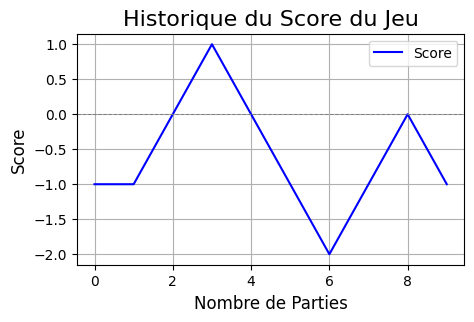

In [1]:
import tkinter as tk
import numpy as np
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import matplotlib.pyplot as plt

choix = ["Pierre", "Papier", "Ciseaux", "Lézard", "Spock"]
règles = {
    (0, 2): 1, (0, 3): 1, (1, 0): 1, (1, 4): 1,
    (2, 1): 1, (2, 3): 1, (3, 1): 1, (3, 4): 1,
    (4, 0): 1, (4, 2): 1
}
règles.update({(j, i): -1 for i, j in règles.keys()})
for i in range(5):
    règles[(i, i)] = 0

mouvements_humain = []
mouvements_ia = []
scores = []
score = 0
mémoire = np.zeros((5, 5), dtype=int)

def decision_ia(mouvement_humain):
    if len(mouvements_humain) < 1:
        return np.random.choice(range(5))
    probabilités = mémoire[mouvement_humain] / (np.sum(mémoire[mouvement_humain]) + 1e-10)
    mouvement_humain_prédit = np.argmax(probabilités)
    return (mouvement_humain_prédit + 1) % 5

def jouer(mouvement_humain):
    global score, mémoire
    mouvement_ia = decision_ia(mouvement_humain)
    if len(mouvements_humain) > 0:
        mémoire[mouvements_humain[-1], mouvement_humain] += 1
    résultat = règles[(mouvement_humain, mouvement_ia)]
    mouvements_humain.append(mouvement_humain)
    mouvements_ia.append(mouvement_ia)
    score += résultat
    scores.append(score)
    etiquette_mouvement.config(
        text=f"Humain : {choix[mouvement_humain]}, IA : {choix[mouvement_ia]}\nRésultat : {'Gagné' if résultat == 1 else 'Perdu' if résultat == -1 else 'Égalité'}"
    )
    etiquette_score.config(text=f"Score : {score}")
    mettre_a_jour_graphique()

def mettre_a_jour_graphique():
    ax.clear()
    ax.plot(scores, label="Score", color="blue")
    ax.axhline(0, color="gray", linestyle="--", linewidth=0.7)
    ax.set_title("Historique du Score du Jeu", fontsize=16)
    ax.set_xlabel("Nombre de Parties", fontsize=12)
    ax.set_ylabel("Score", fontsize=12)
    ax.grid(True)
    ax.legend()
    canvas.draw()

racine = tk.Tk()
racine.title("Pierre-Papier-Ciseaux-Lézard-Spock")
racine.geometry("800x600")  # Définir la taille de la fenêtre (Largeur x Hauteur)

etiquette_mouvement = tk.Label(racine, text="Faites votre choix !", font=("Arial", 14))
etiquette_mouvement.pack(pady=10)

etiquette_score = tk.Label(racine, text="Score : 0", font=("Arial", 12))
etiquette_score.pack(pady=10)

cadre_boutons = tk.Frame(racine)
cadre_boutons.pack()

for i, choix_utilisateur in enumerate(choix):
    bouton = tk.Button(cadre_boutons, text=choix_utilisateur, font=("Arial", 12), command=lambda mouvement=i: jouer(mouvement))
    bouton.grid(row=0, column=i, padx=5, pady=5)

fig, ax = plt.subplots(figsize=(5, 3))
canvas = FigureCanvasTkAgg(fig, master=racine)
widget_canvas = canvas.get_tk_widget()
widget_canvas.pack()

racine.mainloop()
